# 1- Read the dataset file “Cancer.csv”

In [1]:
import numpy as np
import pandas as pd
cancer_df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
cancer_df  #checking Data Set

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


# 2- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [2]:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']
X = cancer_df[feature_cols] 
y = cancer_df['Malignant_Cancer']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# 3- Use “Decision Tree Classifier” and Auc of “Decision Tree Classifier”

In [3]:
from sklearn.tree import DecisionTreeClassifier
my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_predict_dt)
print(' Accuracy:', accuracy_dt)

y_predict_dt_prob = my_decisiontree.predict_proba(X_test)



import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_dt_prob[:,1], pos_label=1)

# AUC:
AUC_DT = metrics.auc(fpr, tpr)
print("\n Decision tree AUC:",AUC_DT,"\n")


 Accuracy: 0.8666666666666667

 Decision tree AUC: 0.8697478991596639 



# 4- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.


In [4]:
bootstarp_size = 0.8*(X_train.shape[0])
from sklearn.utils import resample
predictionList=[]
predictionListprob=[]

for i in range (30):
    
    NewX_train, Newy_train = resample(X_train, y_train, n_samples =int(bootstarp_size) , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(NewX_train, Newy_train)
    y_predict_dt = Base_DecisionTree.predict(X_test)
    
    y_predict_new_prob = Base_DecisionTree.predict_proba(X_test)

    predictionList.append(y_predict_dt)
    predictionListprob.append(y_predict_new_prob[:,1])
    #print('Sample',i,"\n",predictionList[i],"\n")
    #print(predictionListprob[1])

In [5]:
predictionmatrix = np.transpose(np.matrix(predictionList))
predictionmatrix

from scipy import stats
import statistics
newprediction=stats.mode(predictionmatrix,axis=1)
len(newprediction[0])

import itertools
New_list = list(itertools.chain.from_iterable(newprediction[0]))
#print(New_list)


from sklearn.metrics import accuracy_score
accuracy_Voting = accuracy_score(y_test, New_list)
print('\n','Accuracy of Bagging:', accuracy_Voting)


voting_prob_bag=[]
voting_prob_bag=[statistics.mean(i) for i in zip(*predictionListprob)]


fpr1, tpr1, thresholds = metrics.roc_curve(y_test, voting_prob_bag, pos_label=1)

AUC1 = metrics.auc(fpr1, tpr1)
print('\n AUC of Bagging: ',AUC1,"\n")



 Accuracy of Bagging: 0.9111111111111111

 AUC of Bagging:  0.9380252100840336 



# 5- Use scikit-learn “Adaboost” classifier to predict Cancer and report the accuracy and AUC of your classifier

In [6]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators=29,random_state=2)
my_AdaBoost.fit(X_train,y_train)
my_AdaBoost_predict = my_AdaBoost.predict(X_test)
my_AdaBoost_predict_prob = my_AdaBoost.predict_proba(X_test)
AdaBoost_accuracy = accuracy_score(y_test, my_AdaBoost_predict)
print("AdaBoost accuracy: ", AdaBoost_accuracy)

fpr2, tpr2, thresholds3 = metrics.roc_curve(y_test, my_AdaBoost_predict_prob[:,1], pos_label=1)
ada_AUC = metrics.auc(fpr2, tpr2)
print("\nAdaBoost AUC: ", ada_AUC)

AdaBoost accuracy:  0.9555555555555556

AdaBoost AUC:  0.9653361344537815


# 6- In this section, we use an extremely popular Boosting algorithm called “XGBoost”.

In [7]:
import pip
!pip install xgboost

In [8]:
from   xgboost   import   XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train,y_train)
my_XGBoost_predict = my_XGBoost.predict(X_test)
my_XGBoost_predict_prob = my_XGBoost.predict_proba(X_test)
XGBoost_accuracy = accuracy_score(y_test, my_XGBoost_predict)
print("\n XGBoost accuracy: ", XGBoost_accuracy)

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, my_XGBoost_predict_prob[:,1], pos_label=1)
XGB_AUC = metrics.auc(fpr3, tpr3)
print("\n XGBoost AUC: ", XGB_AUC)

[17:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 XGBoost accuracy:  0.9555555555555556

 XGBoost AUC:  0.9716386554621849


C:\Users\billu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# 7- Use scikit-learn “Random Forest” classifier to predict Cancer and report the accuracy and AUC of your classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_predict_prob = my_RandomForest.predict_proba(X_test)
my_RandomForest_accuracy = accuracy_score(y_test, my_RandomForest_predict)
print("\n RF accuracy: ", my_RandomForest_accuracy)

fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, my_RandomForest_predict_prob[:,1], pos_label=1)
RFC_AUC = metrics.auc(fpr4, tpr4)
print("\n RFC AUC: ", RFC_AUC,"\n")



 RF accuracy:  0.9555555555555556

 RFC AUC:  0.9516806722689075 



# 8- Now, plot the ROC curves of your algorithms

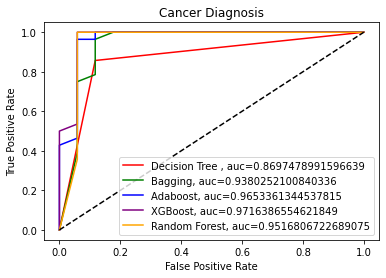

In [17]:
plt.plot(fpr, tpr, color='Red', label='Decision Tree , auc='+str(AUC_DT))
plt.plot(fpr1, tpr1, color='Green', label='Bagging, auc='+str(AUC1))
plt.plot(fpr2, tpr2, color='blue', label='Adaboost, auc='+str(ada_AUC))
plt.plot(fpr3, tpr3, color='purple', label='XGBoost, auc='+str(XGB_AUC))
plt.plot(fpr4, tpr4, color='orange', label='Random Forest, auc='+str(RFC_AUC))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Cancer Diagnosis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

### Which algorithm is the best w.r.t the AUC value?

##### XGBoost (auc- 0.971638) is the best algorithm.

### Which algorithm is the best w.r.t the Accuracy value?

##### Random Forest Classifier, XGBClassifier & AdaBoostClassifier (Accuracy-0.95555555555) are the best algorithms.

### Which algorithm is the best when we want a False Positive Rate of %7?

##### Random Forest Classifier is the best algorithms.

